# PROBLEMA #1: Filtros y Detectores

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [8]:
img = cv2.imread('img/Problema1.jpg')
# 1. Copia de la imagen original con el filtro de gauss 25 x 25
filtro_gauss = cv2.GaussianBlur(img, (25,25),0)
# 2. Copia de la imagen original con el Filtro bilaterial con diametro 39
filtro_bilateral = cv2.bilateralFilter(img, 39, 75, 75)

cv2.imwrite('out/filtro_gauss.png', filtro_gauss)
cv2.imwrite('out/filtro_bilateral.png', filtro_bilateral)

True

Regiones Detectadas usando MSER Detector : 854
Regiones identificadas: 854


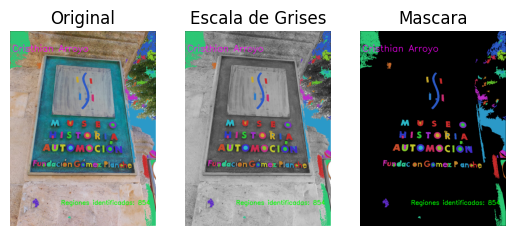

Regiones Detectadas usando MSER Detector : 101
Regiones identificadas: 101


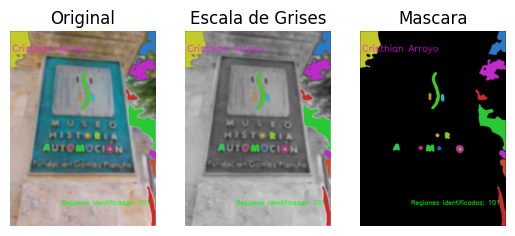

Regiones Detectadas usando MSER Detector : 597
Regiones identificadas: 597


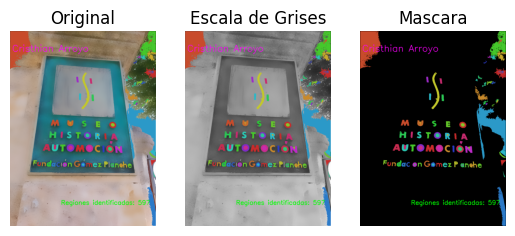

In [10]:
def detector(img:np.ndarray, i:int):
    imgMSER = img
    grayMSER = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Creacion del detector
    mser = cv2.MSER_create()

    coordinates, bboxes = mser.detectRegions(grayMSER)

    coords = []
    for coord, bbox in zip(coordinates, bboxes):
        x,y,w,h = bbox
        if w< 10 or h < 10 or w/h > 5 or h/w > 5:
            continue
        coords.append(coord)
    print( f"Regiones Detectadas usando MSER Detector : {len(coordinates)}")

    colors = [[43, 43, 200], [43, 75, 200], [43, 106, 200], [43, 137, 200],
    [43, 169, 200], [43, 200, 195], [43, 200, 163], [43, 200, 132],
    [43, 200, 101], [43, 200, 69], [54, 200, 43], [85, 200, 43],
    [116, 200, 43], [148, 200, 43], [179, 200, 43], [200, 184, 43],
    [200, 153, 43], [200, 122, 43], [200, 90, 43], [200, 59, 43],
    [200, 43, 64], [200, 43, 95], [200, 43, 127], [200, 43, 158],
    [200, 43, 190], [174, 43, 200], [142, 43, 200], [111, 43, 200],
    [80, 43, 200], [43, 43, 200]]

    np.random.seed(0)
    canvas1 = imgMSER.copy()
    canvas2 = cv2.cvtColor(grayMSER, cv2.COLOR_GRAY2BGR)
    canvas3 = np.zeros_like(imgMSER)

    for cnt in coords:
        xx = cnt[:,0]
        yy = cnt[:,1]
        color = colors[np.random.choice(len(colors))]
        canvas1[yy, xx] = color
        canvas2[yy, xx] = color
        canvas3[yy, xx] = color

    #Configuracion del texto
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.5
    font_color = (255, 0, 255)
    font_thickness = 2

    text1 = 'Cristhian Arroyo'
    cv2.putText(canvas1, text1, (10, 100), font, font_scale, font_color, font_thickness)
    cv2.putText(canvas2, text1, (10, 100), font, font_scale, font_color, font_thickness)
    cv2.putText(canvas3, text1, (10, 100), font, font_scale, font_color, font_thickness)

    text2 = f"Regiones identificadas: {len(coordinates)}"
    print(text2)
    font_color = (0, 255, 0)
    font_scale = 1
    #Reducido de 500 a 250 porque si no tengo que pooner el texto muy chiquito
    cv2.putText(canvas1, text2, (250, 850), font, font_scale, font_color, font_thickness)
    cv2.putText(canvas2, text2, (250, 850), font, font_scale, font_color, font_thickness)
    cv2.putText(canvas3, text2, (250, 850), font, font_scale, font_color, font_thickness)

    cv2.imwrite(f'out/canvas2_{i}.png', canvas2)

    plt.subplot(131)
    plt.imshow(canvas1[:, :, ::-1])
    plt.title('Original')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(canvas2[:, :, ::-1])
    plt.title('Escala de Grises')
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(canvas3[:, :, ::-1])
    plt.title('Mascara')
    plt.axis('off')
    plt.savefig(f"out/MSER_Result_{i}.png", dpi=600, transparent=True)
    plt.show()

detector(img,0)
detector(filtro_gauss, 1)
detector(filtro_bilateral, 2)

# Matriz con 6 imagenes

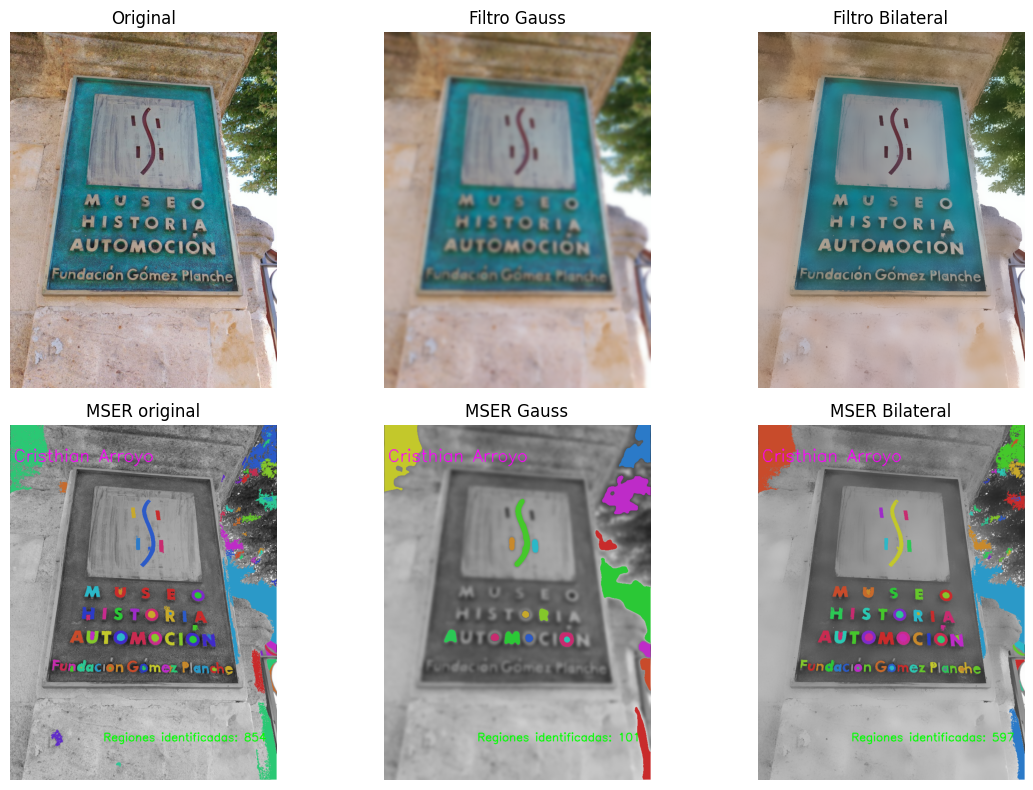

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

rutas_imagenes = ['img/Problema1.jpg', 'out/filtro_gauss.png', 'out/filtro_bilateral.png',
                  'out/canvas2_0.png', 'out/canvas2_1.png', 'out/canvas2_2.png']

rotulados = ['Original', 'Filtro Gauss', 'Filtro Bilateral', 
             'MSER original', 'MSER Gauss', 'MSER Bilateral']

for i, ruta in enumerate(rutas_imagenes):
    imagen = plt.imread(ruta)
    axs[i // 3, i % 3].imshow(imagen)
    axs[i // 3, i % 3].set_title(rotulados[i])
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.savefig("out/Cristhian_Arroyo_P1.png", dpi=600)
plt.show()


# Problema 2: Transformada de Hough

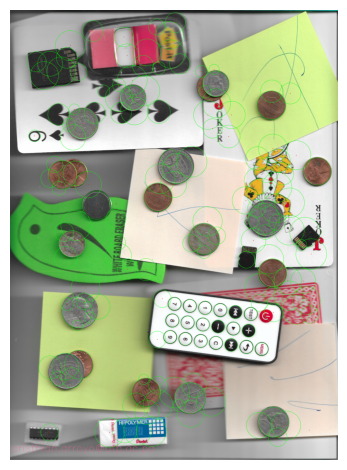

In [40]:
# 1. Cargar imagen en el código
img2 = cv2.imread('img/Problema2.jpg')

#3. Algoritmo de hough
h, w, c = img2.shape
dsize = (int(w * 0.75), int(h * 0.75))
imgCir = cv2.resize(img2, dsize)

src = cv2.medianBlur(imgCir, 5)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=150,
    param1=50,
    param2=30,
    minRadius=60,
    maxRadius=180
)

#2. Agregar un texto con el correo
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 4
font_color = (150, 92, 255)
font_thickness = 2
text = 'cristhian.arroyo@utp.ac.pa'
cv2.putText(imgCir, text, (20,imgCir.shape[0]-100), font, font_scale, font_color, font_thickness)

if circles is not None:
    circles = np.uint16(np.around(circles))

    for circle in circles[0]:
        x, y, radius = circle
        center = (x, y)

        # Dibujar el círculo en la imagen completa
        cv2.circle(imgCir, center, radius, (0, 255, 0), 2)
        cv2.circle(imgCir, center, 2, (0, 0, 255), 3)

    # Mostrar la imagen con los círculos detectados
    plt.imshow(imgCir[:, :, ::-1])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("out/Cristhian_Arroyo_P21.png", dpi=600)
    plt.show()
else:
    print("No se detectaron círculos en la imagen.")

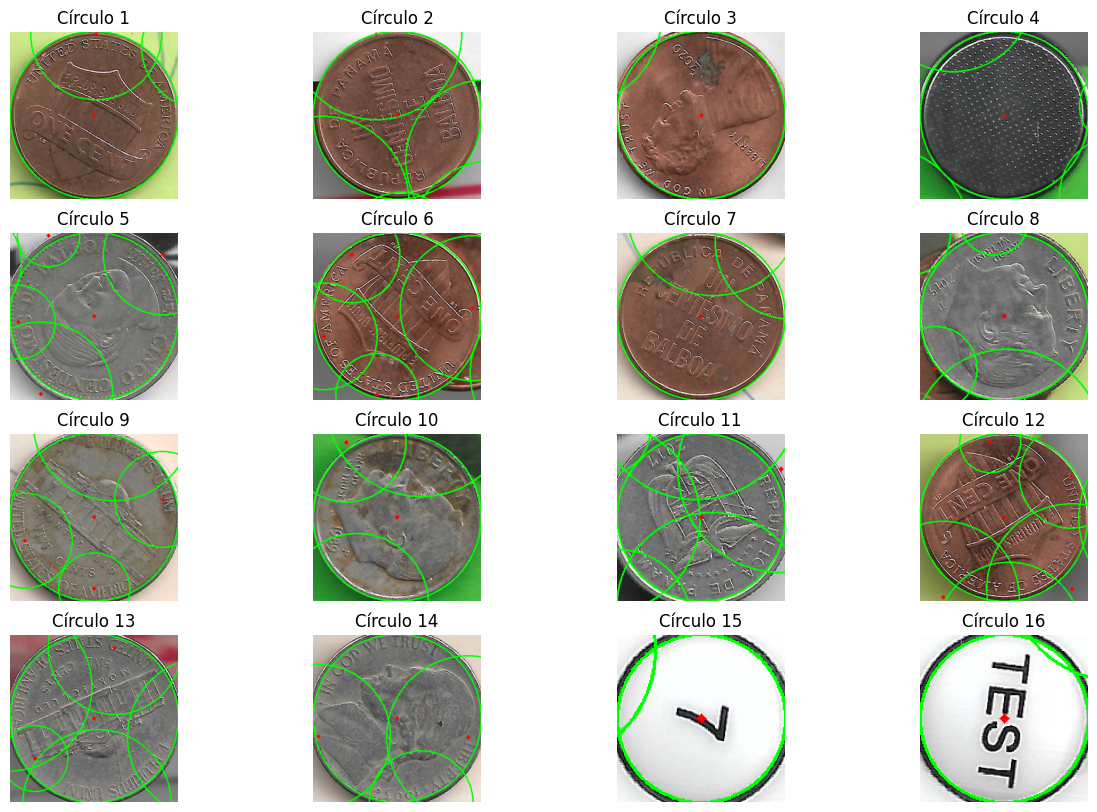

In [41]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    num_circles = len(circles[0])

    # Limitar la cantidad de círculos a mostrar
    num_circles_to_show = min(16, num_circles)

fig, axs = plt.subplots(4, 4, figsize=(15, 10))

for i in range(num_circles_to_show):
    circle = circles[0][i]
    x, y, radius = circle
    center = (x, y)

    # Verificar que el radio sea mayor que cero antes de mostrar la región
    if radius > 0:
        cv2.circle(imgCir, center, radius, (0, 255, 0), 2)
        cv2.circle(imgCir, center, 2, (0, 0, 255), 3)

        # Verificar que las coordenadas sean válidas antes de mostrar la región
        y_min = max(0, y - radius)
        y_max = min(h, y + radius)
        x_min = max(0, x - radius)
        x_max = min(w, x + radius)

        # Recortar el círculo
        circle_region = imgCir[y_min:y_max, x_min:x_max]

        # Calcular los histogramas RGB separados
        for channel in range(3):
            hist, _ = np.histogram(circle_region[:, :, channel], bins=256, range=(0, 256))

        # Mostrar los círculos
        ax = axs[i // 4, i % 4]
        ax.imshow(cv2.cvtColor(circle_region, cv2.COLOR_BGR2RGB))
        ax.set_title(f'Círculo {i + 1}')
        ax.axis('off')

plt.savefig("out/Cristhian_Arroyo_P22.png", dpi=600)
plt.show()

if num_circles == 0:
    print("No se detectaron círculos en la imagen.")

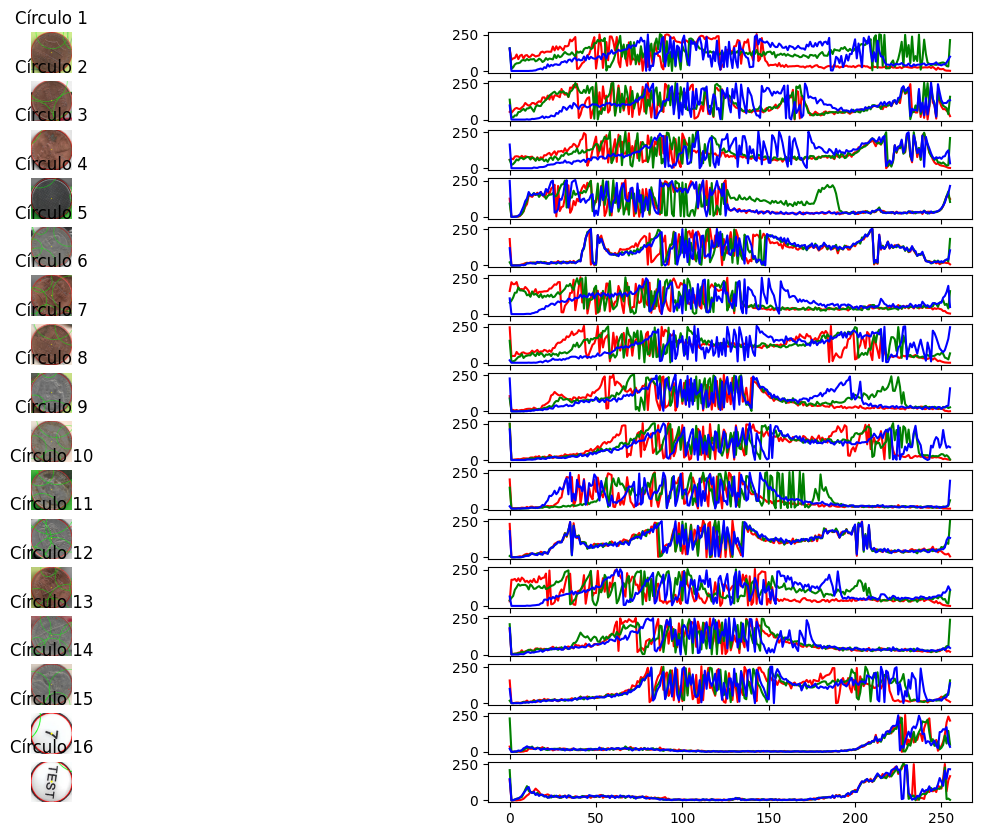

In [39]:
# Limitar la cantidad de círculos a mostrar
num_circles_to_show = 16
# Inicializar una matriz para almacenar los histogramas RGB
histogram_matrix = np.zeros((num_circles_to_show, 256, 3), dtype=np.uint8)

if circles is not None:
    circles = np.uint16(np.around(circles))
    num_circles = len(circles[0])
    # Limitar la cantidad de círculos a mostrar
    num_circles_to_show = min(num_circles_to_show, num_circles)
    fig, axs = plt.subplots(num_circles_to_show, 2, figsize=(15, 10))
    for i in range(num_circles_to_show):
        circle = circles[0][i]
        x, y, radius = circle
        center = (x, y)
        # Verificar que el radio sea mayor que cero antes de mostrar la región
        if radius > 0:
            cv2.circle(imgCir, center, radius, (0, 0, 255), 2)
            cv2.circle(imgCir, center, 2, (0, 255, 255), 3)
            # Verificar que las coordenadas sean válidas antes de mostrar la región
            y_min = max(0, y - radius)
            y_max = min(h, y + radius)
            x_min = max(0, x - radius)
            x_max = min(w, x + radius)
            # Recortar el círculo
            circle_region = imgCir[y_min:y_max, x_min:x_max]
            # Calcular los histogramas RGB separados
            for channel in range(3):
                hist, _ = np.histogram(circle_region[:, :, channel], bins=256, range=(0, 256))
                histogram_matrix[i, :, channel] = hist

            # Mostrar los histogramas RGB separados
            for channel, color in enumerate(['red', 'green', 'blue']):
                ax_hist = axs[i, 1]
                ax_hist.plot(histogram_matrix[i, :, channel], color=color)
            # Mostrar los círculos
            ax_circle = axs[i, 0]
            ax_circle.imshow(cv2.cvtColor(circle_region, cv2.COLOR_BGR2RGB))
            ax_circle.set_title(f'Círculo {i + 1}')
            ax_circle.axis('off')
            
    plt.subplots_adjust(wspace=0.4)
    plt.savefig("out/Cristhian_Arroyo_P23.png", dpi=600)
    plt.show()
else:
    print("No se detectaron círculos en la imagen.")

# Problema 3: Procesamiento en tiempo real

In [2]:
#2. Reduccion de la imagen en un 45%
def resize(frame:np.ndarray):
    w,h = int(frame.shape[1] * 0.55), int(frame.shape[0] * 0.55)
    frame_resize = cv2.resize(frame, (w, h))
    return frame_resize

In [3]:
#3. Detector ORB sobre la imagen escalada
def detector_orb (imgORB: np.ndarray):
    orb = cv2.ORB_create(nfeatures=500)
    kp = orb.detect(imgORB, None)
    imgORB2 = cv2.drawKeypoints(imgORB, kp, None, color=(0, 0, 255), flags=0)
    return imgORB2

In [4]:
def combinar(frame_original:np.ndarray, frame_escalado: np.ndarray):
    h,w, _ = frame_original.shape
    #Se obtiene el tamaño en X del frame escalado lo restamos 
    # con el tamaño del frame original para centrarlo en la esquina
    x = w - frame_escalado.shape[1]
    y = 0
    frame_original[y:y + frame_escalado.shape[0], x:x + frame_escalado.shape[1]] = frame_escalado
    return frame_original

In [5]:
#1. Cargar vídeo (Configuracion del codigo para trabajar con camaras)
cap = cv2.VideoCapture('img/video.mp4')
#Contador de capturas
i = 0

if cap is None:
    sys.exit('Fallo al cargar video')

while (cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        frame_resize = resize(frame)
        frame_resizeORB = detector_orb(frame_resize)
        #5. Imagen escalada en la esquina superior derecha
        frame_combinado = combinar(frame, frame_resizeORB)
        #Mostrar el video con los frames cambiados.
        cv2.imshow('frame', frame_combinado)
        # 6. Permitir que el sistema guarde una captura
        key = cv2.waitKey(25)
        if key == ord('s'):
            cv2.imwrite(f'out/captura{i}.png', frame_combinado)
            print(f'Captura guardada como "captura{i}.png"')
            i+=1
        #Cerrar
        elif cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()